# Task 2: Develop Time Series Forecasting Models


**Model Selection**

Given the options of traditional statistical models (ARIMA, SARIMA) and a deep learning model (LSTM) for time series forecasting,

First, import required libraries and script modules

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor
from model_training import ModelTrainer
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

**Loading the Data**

In [2]:
# Initialize class instances
processor = DataPreprocessor(data_dir = '../data', logger=logger)

# Load the data
tsla_data = processor.load_data('TSLA')


**Prepare the data for ARIMA Modeling**

In [3]:
# Create trainer instance of ModelTrainer
trainer = ModelTrainer(tsla_data, logger=logger)
# Prepare the data for modeling
trainer.prepare_data()


INFO:logger:Data split: 2877 train, 720 test


**Step 1: Train the ARIMA Model**

- optimized the parameters with auto_arima

In [4]:
trainer.train_arima()

INFO:logger:Training ARIMA model


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17584.237, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17588.241, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17589.778, Time=0.76 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17589.777, Time=2.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17589.764, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-17587.780, Time=1.81 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17587.778, Time=2.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17585.778, Time=2.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17591.265, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-17589.267, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17589.266, Time=0.96 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17591.264, Time=0.92 sec


INFO:logger:ARIMA model trained with parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 0), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (0, 0, 0, 0), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': False}


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-17587.265, Time=3.18 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 21.106 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2877
Model:               SARIMAX(1, 1, 0)   Log Likelihood                8797.633
Date:                Sat, 09 Nov 2024   AIC                         -17591.265
Time:                        19:15:11   BIC                         -17579.337
Sample:                    01-02-2015   HQIC                        -17586.966
                         - 11-17-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0349      0.009     -3.889      0.000      -0.0

**Step 2: Train the SARIMA Model**

- optimized the parameters with auto_arima

In [5]:
trainer.train_sarima()

INFO:logger:Training SARIMA model


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=3.78 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-15500.163, Time=0.40 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-16350.693, Time=1.31 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=4.53 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-15514.588, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-16717.725, Time=6.77 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=8.11 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=9.80 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-16713.730, Time=1.71 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-16715.727, Time=2.52 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-16715.731, Time=5.50 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-16717.670, Time=2.37 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-16713.744, Time=3.78 sec


INFO:logger:SARIMA model trained with parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 0), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (2, 1, 0, 5), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': False}


 ARIMA(1,1,0)(2,1,0)[5] intercept   : AIC=-16715.724, Time=9.27 sec

Best model:  ARIMA(1,1,0)(2,1,0)[5]          
Total fit time: 60.097 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2877
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 5)   Log Likelihood                8362.863
Date:                           Sat, 09 Nov 2024   AIC                         -16717.725
Time:                                   19:16:11   BIC                         -16693.876
Sample:                               01-02-2015   HQIC                        -16709.127
                                    - 11-17-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

**Step 3: Train LSTM model**

INFO:logger:Training LSTM model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0370 - val_loss: 0.0045
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.

INFO:logger:LSTM model training completed


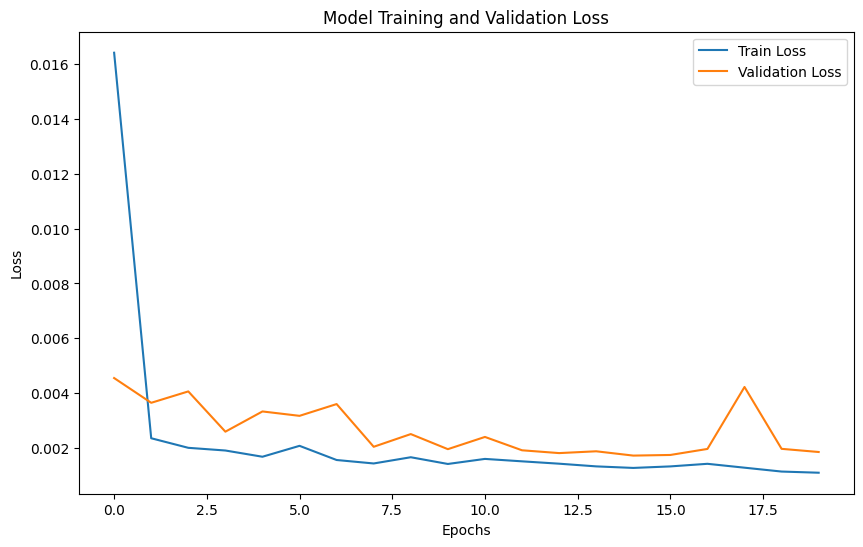

INFO:logger:Training history plotted successfully


In [6]:
trainer.train_lstm()

**Step 4: Make Predictions**

In [7]:
trainer.make_prediction()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

INFO:logger:Predictions generated for all models


**Step 5: Evaluate the models**

The models are evaluating using
- MAE, RSME, MAPE

In [8]:
trainer.evaluate_model()

INFO:logger:ARIMA - MAE: 0.09, RMSE: 0.12, MAPE: 17.81%
INFO:logger:SARIMA - MAE: 1.84, RMSE: 2.12, MAPE: 365.89%
INFO:logger:LSTM - MAE: 0.12, RMSE: 0.15, MAPE: 29.51%



Model Evaluation Metrics:
     Model       MAE      RMSE        MAPE
0   ARIMA  0.091880  0.115382   17.812919
1  SARIMA  1.837669  2.118270  365.893112
2    LSTM  0.124120  0.148494   29.505672


**Step 6: Compare the models**

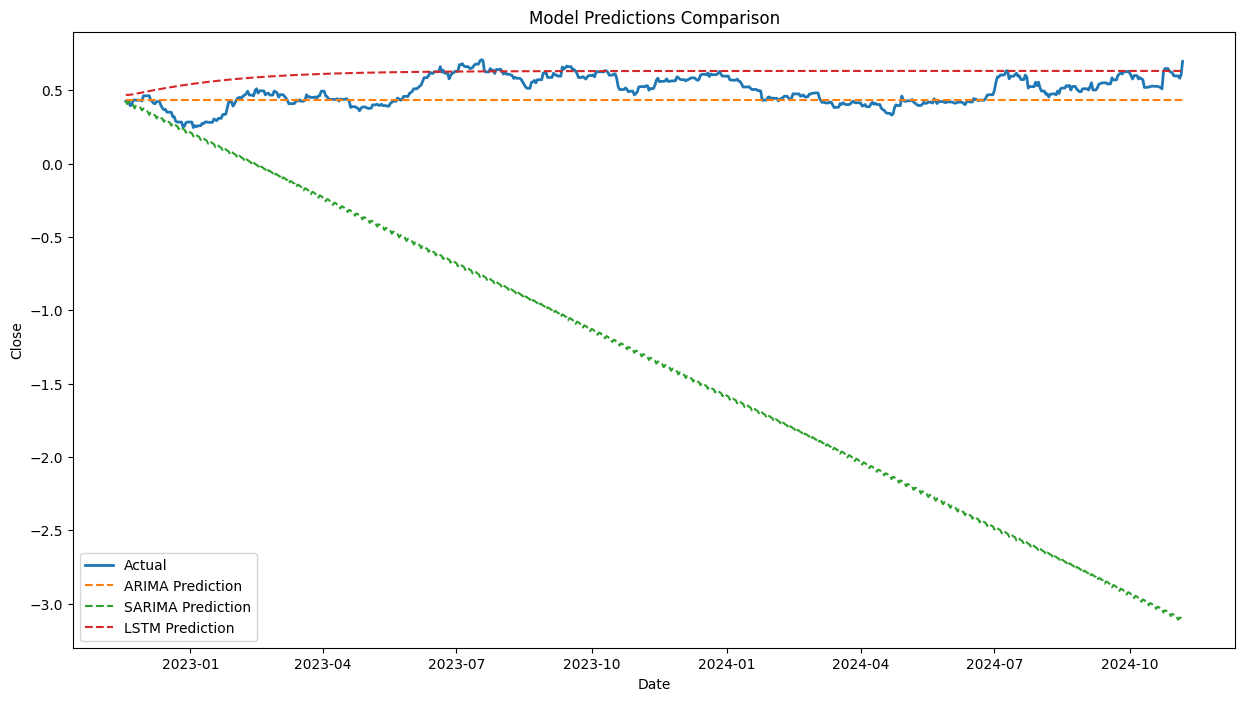

INFO:logger:Results plotted successfully


In [9]:
trainer.plot_result()

**Step 7: Save the best model for future forecasting**

In [10]:
trainer.save_best_model(model_name='LSTM')
trainer.save_best_model(model_name='ARIMA')

INFO:logger:LSTM model saved successfully.
INFO:logger:ARIMA model saved successfully.
